In [1]:
## load libraries
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
import cmath as cm
from scipy import signal as sps
from IPython.display import HTML

# Introduction to Signal Processing

## Overview
The first part of this notebook will quickly go over several basic concepts from mathematics and physics that are important for signal processing. Nothing in this should be above college mathematics and physics, so if you feel confident you rember it, feel free to skip. 
1. [Complex numbers](#Complex-Numbers) are fairly essential to understanding how sinusoids are represented in signal processing (and electronics in general). They are also a big help for visualising amplitude and phase of a signal.
2. [Temporal Vs. Spectral Space](#Temporal-Vs.-Spectral-Space) will cover some concepts important to understanding what an electronic signal is and how to decompose it into it's components. The focus will lay on the Fourier series and transforms.
3. [Acquiring Data](#Acquiring-Data) will cover some of the basic concepts of data acquisition, such as the Nyquist-Shanon Theorem



# Complex Numbers
Why are we talking about complex numbers? The explanations go beyond the scope of this introduction, but the short version is that in engineering, a sinusoidal signal with time-invariant amplitude (A), angular frequency ($\omega$) and initial phase ($\varphi$) can be represented by a complex number called a phasor (short for phase vector). 

A quick and not quite exact explanation of these terms
- amplitude (A): the distance from the signals mid value to its maxima.
- angular frequency ($\omega$): ' to frequency, but indicating how quickly the signal goes through it's cycle. It is straightforward to compute from the frequency: $\omega = 2 \cdot \pi \cdot f$. If you remember your high school math, $2\pi$ in radians is a complete revolution (ie. $360^\circ$).
- frequency (f): how often the signals oscillates around its mid value.
- phase ($\varphi$): the delay in relation to an arbitrary point in the cycle of the signal, usually the starting point of another signal.

The same signal can be represented as:
- $x(t) = A \cdot \sin(\omega t + \varphi)$
- $x(t) = A \cdot e^{\imath(\omega t + \varphi)}$

These are equivalent. If you want to check this, use Euler's formula. A phasor is written without reference to time change, but only with reference to another signal, hence it is usually written as $A\cdot e^{\imath\cdot\varphi}$ or $A\angle\varphi$.

## The Imaginary Number $\imath$
You will have noted that these notations use the imaginary number $\imath = \sqrt{-1}$. This is the whole reason for this chapter. We will go over the most basic properties of complex numbers and how to use them. If you remember this from college, feel free to skip.

Note that in engineering, $\jmath$ is often used to represent the imaginary number in order to avoid confusion with the electric current, denotated *i*. This document should only use $\imath$, but my engineering training might get the better of me.

## Representation
There are two ways to represent complex number:
- *rectangular* or *cartesian*: decomposes the number into it's real and imaginary part and is written as $z = re + \imath \cdot im$ where $re$ and $im$ are, respectively, the real and imaginary parts of the number.
- *polar*: the number is represented as $magnitude \cdot e^{\imath\cdot argument}$ where the magnitude (r) (or modulus) is the distance from the origin (O) to the point and the argument describes the angle between the line going from the origin to z and the positive real axis.
Maybe you noticed that the polar representation uses a very similar representation as the phasor above. This is not a coincidence, $\varphi$ represents a delay in the cycle, so it is the same as the phase of our phasor. The magnitude represents the maximal value that can be projected on the real (or imaginary) axis and is the same as the amplitude of the phasor.

The way to represent a complex number I find the most helpful is to draw the number on the complex plane:

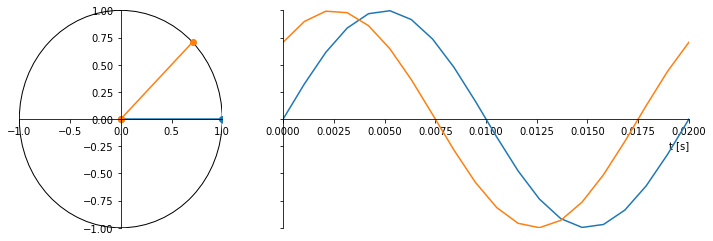

In [2]:
# Prepare a complexe plane plot (aka argand diagram)
fig, ax = plt.subplots(1,2,figsize=(12,4),sharey='row',gridspec_kw={'width_ratios': [1, 2]})
ax[0].axis([-1,1,-1,1])
ax[0].spines['left'].set_position('center')
ax[0].spines['bottom'].set_position('center')
ax[0].spines['right'].set_color('none')
ax[0].spines['top'].set_color('none')
ax[0].add_artist(plt.Circle([0,0],1,color='k', fill=False))

## define a number and represent it as a vector on the complex plane
# pick an arbitrary phase
phi1 = 0
z1 = complex(np.cos(phi1),np.sin(phi1))
l1, = ax[0].plot([0,z1.real],[0,z1.imag],marker='o');
phi2 = np.pi/4 # 45° expressed in radians
z2 = complex(np.cos(phi2),np.sin(phi2))
l2, = ax[0].plot([0,z2.real],[0,z2.imag],marker='o');

## Let's plot the signals as a time series next to it
# Pick an arbitrary frequency
f = 50;
t = np.linspace(0,1/f,20) # 1/f, aka the periode of the signal (T), is one complete cycle.
x1 = np.sin(2*np.pi*f*t+phi1)
x2 = np.sin(2*np.pi*f*t+phi2)
ax[1].axis([0,1/f,-1,1])
ax[1].spines['bottom'].set_position('center')
ax[1].spines['right'].set_color('none')
ax[1].spines['top'].set_color('none')
plt.xlabel('t [s]', horizontalalignment='right', x=1)

l3, = ax[1].plot(t,x1)
l4, = ax[1].plot(t,x2);

In [3]:
## Let's animate this
# using the same amount of samples for phi, t and the animation frequency will make things much simpler
Nframes = 20;
phi = np.linspace(0,2*np.pi,Nframes)
t = np.linspace(0,1/f,Nframes)
# recompute x1 and x2 with the new sample rate
x1 = np.sin(2*np.pi*f*t+phi1)
x2 = np.sin(2*np.pi*f*t+phi2)

def animate(i):
    z1 = complex(np.cos(phi[i]+phi1),np.sin(phi[i]+phi1))
    z2 = complex(np.cos(phi[i]+phi2),np.sin(phi[i]+phi2))
    l1.set_data([0,z1.real],[0,z1.imag])
    l2.set_data([0,z2.real],[0,z2.imag])
    l3.set_data(t[0:i],x1[0:i])
    l4.set_data(t[0:i],x2[0:i])

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=Nframes)


HTML(ani.to_jshtml())

As you can see, the phasor z1 lags behind z2 by a constant angle $\varphi_2$. The same difference can be observed in the time series: x1 laggs behind x2 by a constant delay. this delay can be computed $\Delta t = T\cdot{\varphi_2\over2\cdot\pi}$ where $T$ is the **period** of the signal and is the inverse of the frequency $T = {1\over f}$. It is the amount of time for a full cycle. In this example, we have:
\begin{equation*}
    \varphi_2 = 45° = {\pi\over4}\\ 
    T = {1\over f} = {1\over 50} = 0.02\ seconds
\end{equation*}
and therefore
\begin{equation*}
    \Delta t = {1\over50}\cdot{{\pi\over4}\over2\cdot\pi}={1\over50}\cdot{1\over8} = 0.0025\ seconds
\end{equation*}




## Operations with complex numbers
There are many mathematical relationships for complex numbers. There are two (well four) really important operations: addition and multiplication (substraction and division being, in a way, special cases of each respectively). This is one of the reason both representation for complex nubers (cartesian and polar) are used. It is very easy to add (or substract) in cartesian representation and it is very easy to multiply (or divide) in polar representation.

Given two complex numbers $x = x_r + \imath \cdot x_i$ and $y = y_r + \imath \cdot y_i$
\begin{equation}
x + y = (x_r + y_r) + \imath \cdot (x_i + y_i)\\
x \cdot y = x_r \cdot y_r + \imath \cdot x_r \cdot y_i + \imath \cdot x_i \cdot y_r + \imath^2 \cdot x_i \cdot y_i
\\
\ldots = (x_r \cdot y_r)-(x_i \cdot y_i) + \imath \cdot (x_r \cdot y_i + \cdot x_i \cdot y_r)
\end{equation}

Or, given two complex numbers $x = m_x \cdot e^{\imath\cdot \varphi_x}$ and $y = m_y \cdot e^{\imath\cdot \varphi_y}$

Using the notation
$$
    \Re a = \mathrm{the\ real\ part\ of\ } a =  m_a \cdot \cos(\varphi_a)\\
    \Im a = \mathrm{the\ imaginary\ part\ of\ } a =   m_a \cdot \sin(\varphi_a)\\
$$
We sum as with cartesian numbers
$$
x + y = \Re x + \Re y +\imath\cdot (\Im x + \Im y)
$$
and we convert this back to polar
$$
m_{xy} = \sqrt{(\Re x + \Re y)^2+(\Im x + \Im y)^2)}\\
\varphi_{xy} = \tan^{-1}\left({{\Im x + \Im y}\over{\Re x + \Re y}}\right)
$$
If you wisch to expand this, it's a good trigonometry exercise (make sure to check out the *angle sum and difference* trigonometric identities), but it's quite tedious.